C:\Users\sneha\AppData\Local\Temp\ipykernel_18732\2570652841.py:14: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_dis = pdr.get_data_tiingo('DIS', api_key=key)


Mean Squared Error (MSE): 5.175604462485652


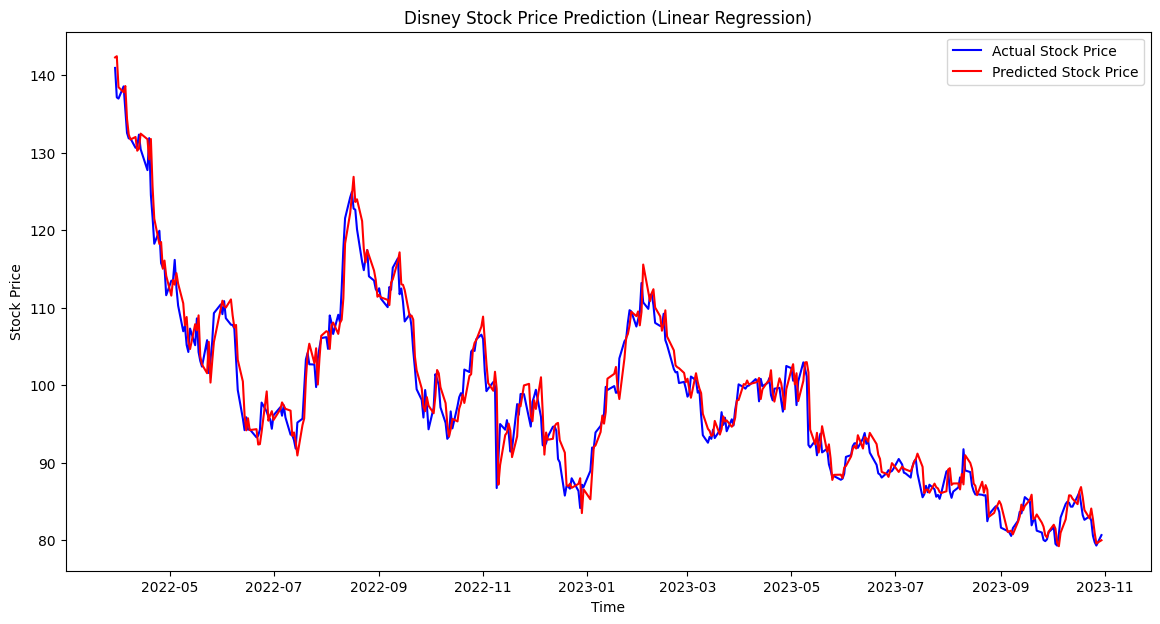

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr

# API key for Tiingo
key = "30c0973b8a648106ae38faea9031b9a3924c7469"

# Getting the Disney (DIS) dataset
df_dis = pdr.get_data_tiingo('DIS', api_key=key)

# Save the dataset to a CSV file
df_dis.to_csv('DIS.csv')

# Read the data and parse the date column
df_dis = pd.read_csv('DIS.csv', parse_dates=['date'], index_col='date')

# Split the data into training and test sets
df_training_dis = df_dis[df_dis.index <= '2022-01-01'].copy()
df_test_dis = df_dis[df_dis.index > '2022-01-01'].copy()

# Extract the 'adjClose' values for training and test
training_data_dis = df_training_dis['close'].values
test_data_dis = df_test_dis['close'].values

# Train a Linear Regression model
X_train_dis, y_train_dis = [], []
X_test_dis, y_test_dis = [], []

# Create sequences of historical data
for i in range(60, len(training_data_dis)):
    X_train_dis.append(training_data_dis[i-60:i])
    y_train_dis.append(training_data_dis[i])

for i in range(60, len(test_data_dis)):
    X_test_dis.append(test_data_dis[i-60:i])
    y_test_dis.append(test_data_dis[i])

X_train_dis, y_train_dis = np.array(X_train_dis), np.array(y_train_dis)
X_test_dis, y_test_dis = np.array(X_test_dis), np.array(y_test_dis)

# Initialize and train the Linear Regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train_dis, y_train_dis)

# Predict using the Linear Regression model
y_pred_dis = lr_regressor.predict(X_test_dis)

# Evaluate the model
mse = mean_squared_error(y_test_dis, y_pred_dis)
print(f"Mean Squared Error (MSE): {mse}")

# Visualize actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(df_test_dis.index[60:], y_test_dis, color='blue', label='Actual Stock Price')
plt.plot(df_test_dis.index[60:], y_pred_dis, color='red', label='Predicted Stock Price')
plt.title('Disney Stock Price Prediction (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
